In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
print("Read Redwood dataset")
color_raw = o3d.io.read_image("data/rgb.png")
depth_raw = o3d.io.read_image("data/depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


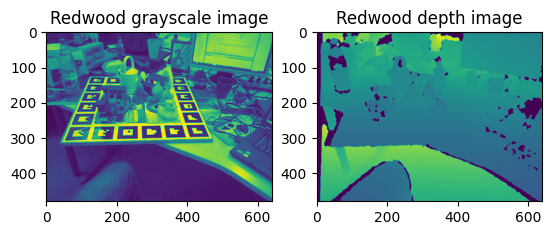

In [3]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [4]:
pinhole = o3d.camera.PinholeCameraIntrinsic()
pinhole.intrinsic_matrix = [[572.4114, 0.0, 325.2611], [ 0.0, 573.57043, 242.04899], [ 0.0, 0.0, 1.0]]


In [5]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, pinhole)
# # Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [7]:
o3d.io.write_point_cloud('data/pointcloud.pcd', pcd, write_ascii=False, compressed=False, print_progress=False)

True